In [14]:
from pandas import read_excel, DataFrame
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [15]:
# Поле  Описание	                        Тип
# X1	Относительная компактность	        FLOAT
# X2	Площадь	                            FLOAT
# X3	Площадь стены	                    FLOAT
# X4	Площадь потолка	                    FLOAT
# X5	Общая высота	                    FLOAT
# X6	Ориентация	                        INT
# X7	Площадь остекления	                FLOAT
# X8	Распределенная площадь остекления	INT
# y1	Нагрузка при обогреве	            FLOAT
# y2	Нагрузка при охлаждении	            FLOAT

dataset = read_excel('ENB2012_data.xlsx')
dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,NaN,NaN


In [16]:
dataset.drop(columns={"Unnamed: 10", "Unnamed: 11"}, inplace=True)
dataset.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889430,0.895785
X6,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
X7,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269842,0.207505
X8,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-2.586763e-03,2.698417e-01,8.736846e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


In [17]:
dataset = dataset.drop(['X1','X4'], axis=1)
dataset.head()

In [18]:
trg = dataset[['Y1','Y2']]
trn = dataset.drop(['Y1','Y2'], axis=1)

In [19]:
models = [LinearRegression() # метод наименьших квадратов
            , RandomForestRegressor(n_estimators=100, max_features ='sqrt') # случайный лес
            , KNeighborsRegressor(n_neighbors=6) # метод ближайших соседей
            , SVR(kernel='linear') # метод опорных векторов с линейным ядром
            #, LogisticRegression() # логистическая регрессия
            ]
models

[LinearRegression(),
 RandomForestRegressor(max_features='sqrt'),
 KNeighborsRegressor(n_neighbors=6),
 SVR(kernel='linear')]

In [20]:
Xtrn, Xtest, Ytrn, Ytest = train_test_split(trn, trg, test_size=0.4)
Xtrn, Xtest, Ytrn, Ytest

(       X1     X2     X3     X4   X5  X6    X7  X8
 558  0.71  710.5  269.5  220.5  3.5   4  0.40   1
 296  0.86  588.0  294.0  147.0  7.0   2  0.25   1
 413  0.71  710.5  269.5  220.5  3.5   3  0.25   3
 333  0.62  808.5  367.5  220.5  3.5   3  0.25   1
 685  0.82  612.5  318.5  147.0  7.0   3  0.40   4
 ..    ...    ...    ...    ...  ...  ..   ...  ..
 422  0.66  759.5  318.5  220.5  3.5   4  0.25   3
 629  0.90  563.5  318.5  122.5  7.0   3  0.40   3
 437  0.90  563.5  318.5  122.5  7.0   3  0.25   4
 657  0.69  735.0  294.0  220.5  3.5   3  0.40   3
 492  0.82  612.5  318.5  147.0  7.0   2  0.25   5
 
 [460 rows x 8 columns],
        X1     X2     X3     X4   X5  X6    X7  X8
 628  0.90  563.5  318.5  122.5  7.0   2  0.40   3
 261  0.76  661.5  416.5  122.5  7.0   3  0.10   5
 421  0.66  759.5  318.5  220.5  3.5   3  0.25   3
 313  0.74  686.0  245.0  220.5  3.5   3  0.25   1
 592  0.79  637.0  343.0  147.0  7.0   2  0.40   2
 ..    ...    ...    ...    ...  ...  ..   ...  ..
 761

In [21]:
#создаем временные структуры
TestModels = DataFrame()
tmp = {}
#для каждой модели из списка
for model in models:
    #получаем имя модели
    m = str(model)
    print(m)
    tmp['Model'] = m[:m.index('(')]    
    #для каждого столбцам результирующего набора
    for i in range(Ytrn.shape[1]):
        #обучаем модель
        model.fit(Xtrn, Ytrn.iloc[:,i]) 
        #вычисляем коэффициент детерминации
        tmp['R2_Y%s'%str(i+1)] = r2_score(Ytest.iloc[:,0], model.predict(Xtest))
    #записываем данные и итоговый DataFrame
    TestModels = TestModels.append([tmp])
#делаем индекс по названию модели
TestModels.set_index('Model', inplace=True)    

LinearRegression()
RandomForestRegressor(max_features='sqrt')
KNeighborsRegressor(n_neighbors=6)
SVR(kernel='linear')


In [22]:
TestModels

,R2_Y1,R2_Y2
Model,,
LinearRegression,0.909438,0.852437
RandomForestRegressor,0.991060,0.912254
KNeighborsRegressor,0.927204,0.851489
SVR,0.880117,0.844308


<AxesSubplot:title={'center':'R2_Y2'}, xlabel='Model'>

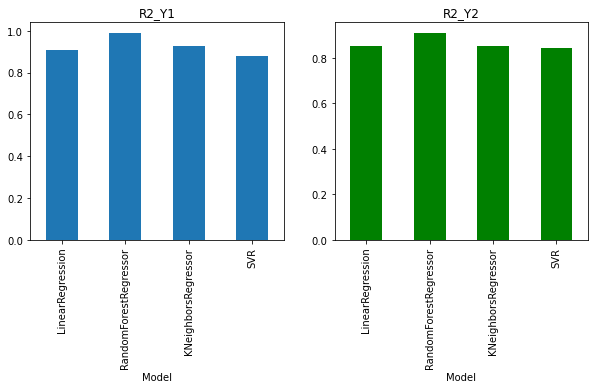

In [23]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4))
TestModels.R2_Y1.plot(ax=axes[0], kind='bar', title='R2_Y1')
TestModels.R2_Y2.plot(ax=axes[1], kind='bar', color='green', title='R2_Y2')


In [24]:
model = models[1]
model.fit(Xtrn, Ytrn)

RandomForestRegressor(max_features='sqrt')

In [25]:
model.feature_importances_

array([0.18553464, 0.22373607, 0.05718574, 0.21782405, 0.2345401 ,
       0.0081628 , 0.04937112, 0.02364547])

In [26]:
model.predict([ [0,     0,  0,  0,  0,  0]
               ,[514.50,    294,     7, 2,  0,	0]])

ValueError: X has 6 features, but DecisionTreeRegressor is expecting 8 features as input.